<font size="+3"><strong>2. Imbalanced Data</strong></font>

# Explore

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree

from category_encoders import OrdinalEncoder
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("Bankdata.csv")

df = df.drop("Unnamed: 0", axis=1)
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (86399, 15)


,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,yes,no,unknown,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,yes,no,unknown,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,yes,no,unknown,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,no,no,unknown,may,198,1,-1,0,unknown,no


In [3]:
filepath = "Bank Marketing/Bankdata.csv"

def wrangle(filepath):
    """
    Wrangles the  data by:
    1. Reading the CSV file.
    2. Dropping the 'Unnamed: 0' column.
    3. Encoding the target variable 'y' to 0 and 1.
    4. Selecting only numeric data features.

    Parameters:
    filepath (str): Path to the CSV file.

    Returns:
    pd.DataFrame: Cleaned and wrangled DataFrame.
    """
    # Read the CSV file
    df = pd.read_csv(filepath)

    # Drop unnecessary column 'Unnamed: 0'
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)

    # Encode target variable 'y' to 0 and 1
    if 'y' in df.columns:
        df['y'] = df['y'].map({'yes': 1, 'no': 0})

    # Select only numeric data features
    df = df.select_dtypes(include='number')

    # Print DataFrame type and shape
    print("df type:", type(df))
    print("df shape:", df.shape)

    return df

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,yes,no,unknown,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,yes,no,unknown,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,yes,no,unknown,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,no,no,unknown,may,198,1,-1,0,unknown,no


Create a bar chart of the value counts for the `"y"` column. Calculate the relative frequencies of the classes. Set the `normalize` argument to `True`.

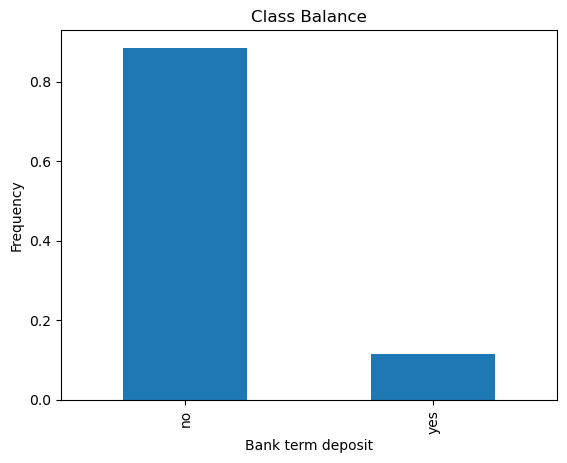

In [5]:
# Plot class balance
df["y"].value_counts(normalize=True).plot(kind="bar", 
                                                 xlabel="Bank term deposit", 
                                                 ylabel="Frequency", 
                                                 title="Class Balance");

`yes` is the positive class(minority) and `no` is the negative class(majority) in relation to the target variable `y` that a client will opt for a bank term deposit.

Create two variables, `majority_class_prop` and `minority_class_prop`, to store the normalized value counts for the two classes in `df["y"]`. 

In [6]:
majority_class_prop, minority_class_prop = df["y"].value_counts(normalize=True).round(4)
print(majority_class_prop, minority_class_prop)

0.8851 0.1149


It is observed that most clients will not open up term deposit accounts with the bank as evidenced by the visualization above. However, it also shows us that we have an imbalanced dataset, where our majority class is far bigger than our minority class.

Use seaborn to create a boxplot that shows the distributions of the `"age"` column for both groups in the `"y"` column. Remember to label your axes.

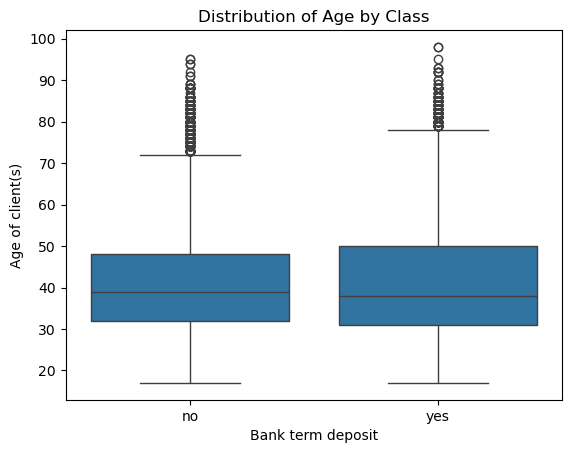

In [7]:
# Create boxplot

sns.boxplot(x="y",y="age", data = df)
plt.xlabel("Bank term deposit")
plt.ylabel("Age of client(s)")
plt.title("Distribution of Age by Class");

Use the `describe` method on the column for `"age"`. What can you tell about the distribution of the data based on the mean and median?

In [8]:
# Summary statistics for `age`
df["age"].describe().apply("{0:,.0f}".format)

count    86,399
mean         41
std          11
min          17
25%          32
50%          39
75%          48
max          98
Name: age, dtype: object

The median age is around 39, but the mean age is over 41. That suggests that this feature is skewed to the right.
The youngest client(s) is 17 years of age whie the oldest client(s) is 98years if age.

Exactly half of the total 86,399 clients who sought for bank services were older than age 39 and half of the total number were less than the same age.

Create a histogram of `"age"`. Make sure to label x-axis `"Age of Client(s)"`, the y-axis `"Count"`, and use the title `"Distribution of Age"`.

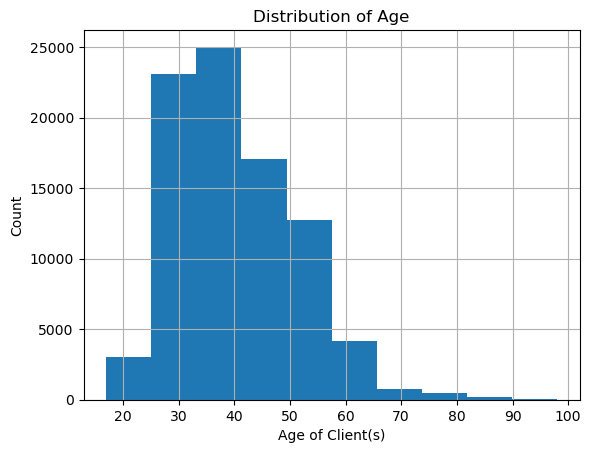

In [9]:
# Plot histogram of `age`
df["age"].hist()
plt.xlabel("Age of Client(s)")
plt.ylabel("Count"),
plt.title("Distribution of Age");

Most of the clients whose information was captured range between 30 to 41 years of age as seen from above.

#### Trim the data.

Recreate the boxplot that you made above, this time only using the values for `"age"` that fall between the `0.1` and `0.9` quantiles for the column.

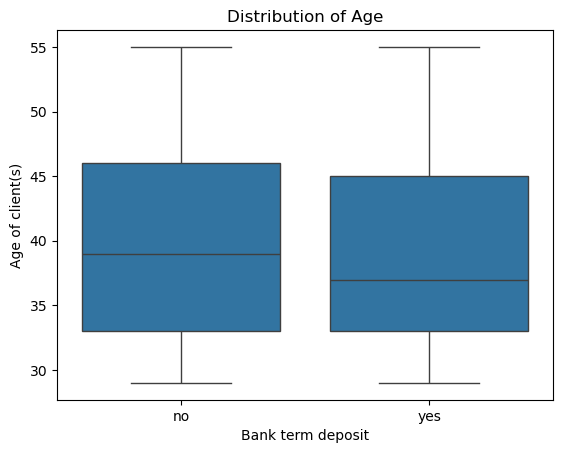

In [10]:
# Create clipped boxplot
q1, q9 = df["age"].quantile([0.1, 0.9])
mask = df["age"].between(q1, q9)
sns.boxplot(x="y",y="age", data = df[mask])
plt.xlabel("Bank term deposit")
plt.ylabel("Age of client(s)")
plt.title("Distribution of Age");

Both classes seem to have a similar median age, i.e. around 38–40 years and the spread of age is quite consistent for both classes implying that age alone may not be a strong differentiator between these two groups.

Plot a correlation heatmap of the remaining numerical features in `df`. Since `"y"` will be your target, you don't need to include it in your heatmap. 

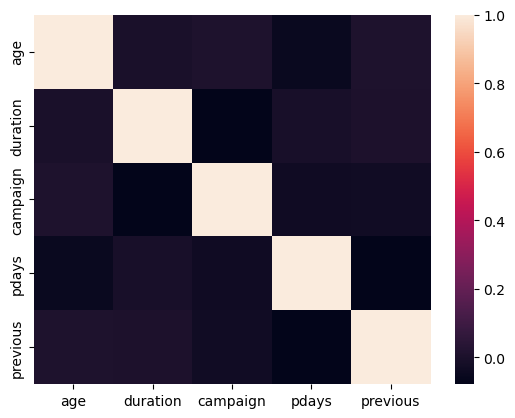

In [11]:
# Create correlation matrix
correlation = df.select_dtypes("number").corr()
# Plot heatmap of `correlation`
sns.heatmap(correlation);

There is no correlation between the variables.

## Split

Create a feature matrix `X` and target vector `Y`. The target is `"y"`. 

In [12]:
target = "y"
X = df.drop(columns=target)
Y = df[target]

print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (86399, 14)
Y shape: (86399,)


Divide the data (`X` and `Y`) into training and test sets using a randomized train-test split. The validation set should be 20% of the total data. Set a `random_state` for reproducibility. 

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state = 42)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (69119, 14)
Y_train shape: (69119,)
X_test shape: (17280, 14)
Y_test shape: (17280,)


## Resample

Now that we've split our data into training and validation sets, we can address the class imbalance we saw during our EDA. One strategy is to resample the training data.

Create a new feature matrix `X_train_under` and target vector `Y_train_under` by performing random under-sampling on your training data.

In [14]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, Y_train_under = under_sampler.fit_resample(X_train, Y_train)
print(X_train_under.shape)
X_train_under.head(2)

(15898, 14)


,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
68214,41,admin.,single,university.degree,no,no,no,cellular,aug,127,4,999,0,nonexistent
80159,34,admin.,married,university.degree,no,no,no,cellular,may,377,1,999,0,nonexistent


Over-sampling

Create a new feature matrix `X_train_over` and target vector `Y_train_over` by performing random over-sampling on your training data.

In [15]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, Y_train_over = over_sampler.fit_resample(X_train, Y_train)
print(X_train_over.shape)
X_train_over.head(2)

(122340, 14)


,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
0,53,retired,married,secondary,no,no,no,unknown,jun,160,1,-1,0,unknown
1,24,services,single,secondary,no,yes,no,cellular,apr,297,1,323,2,failure


# Build Model

## Baseline

As always, we need to establish the baseline for our model. Since this is a classification problem, we'll use accuracy score.

Calculate the baseline accuracy score for the model.

In [16]:
acc_baseline = Y_train.value_counts(normalize =True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.885


Because our classes are imbalanced, the baseline accuracy is very high. We should keep this in mind because, even if our trained model gets a high validation accuracy score, that doesn't mean it's actually *good*.

## Iterate

Now that we have a baseline, let's build a model to see if we can beat it.

Create a pipeline named `model` that contains a `OrdinalEncoder` transformer and a `DecisionTreeClassifier` predictor. (Be sure to set a `random_state` for your predictor.) Then fit your model to the training data. 

In [17]:
# Build Model
model = make_pipeline(
        OrdinalEncoder(),
        DecisionTreeClassifier(max_depth=6, random_state=42)) # Random_state looks through the data features in 
                                                                #a random order hence making the process more reproducible.

# Fit model to training data
model.fit(X_train, Y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['job', 'marital', 'education', 'default',
                                      'housing', 'loan', 'contact', 'month',
                                      'poutcome'],
                                mapping=[{'col': 'job', 'data_type': dtype('O'),
                                          'mapping': retired           1
services          2
unemployed        3
housemaid         4
self-employed     5
blue-collar       6
admin.            7
entrepreneur      8
technician        9
management       10
unknown          11
student          12
NaN              -2
dtype: int64},
                                         {'col': 'mari...
                                          'mapping': unknown      1
cellular     2
telephone    3
NaN         -2
dtype: int64},
                                         {'col': 'month',
                                          'data_type': dtype('O'),
                                          'mapping': jun     1
apr     2
aug     3
sep     4
may     5
jul     6
feb     7
nov     8
jan     9
mar    10
oct    11
dec    12
NaN    -2
dtype: int64},
                                         {'col': 'poutcome',
                                          'data_type': dtype('O'),
                                          'mapping': unknown        1
failure        2
nonexistent    3
success        4
other          5
NaN           -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])

## Evaluate

Calculate training and test accuracy for the models.

In [18]:
acc_train = accuracy_score(Y_train,model.predict(X_train))
acc_val = model.score(X_test, Y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 0.91
Validation Accuracy: 0.9


Plot a confusion matrix that shows how your best model performs on your validation set.

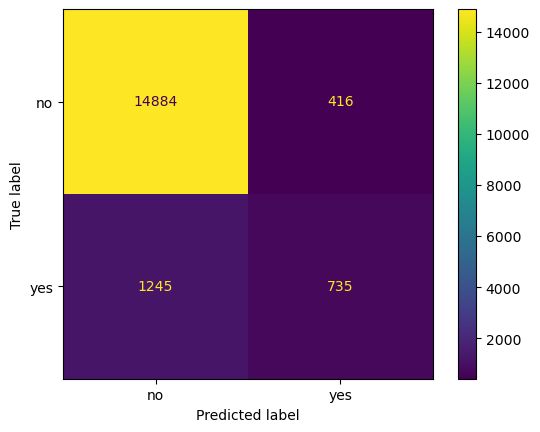

In [19]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test);

The model predicted 14,884 true negatives [that a client will not open a bank term deposit account](right prediction) and predicted 735 clients obtaining a bank deposit term with the bank. In the confusion matrix above, we observe that 14,884 + 416 = 15,300 **(97%)** clients did not subscribe to a term deposit and were correctly classified and 1,245 + 735 = 1,980 **(37%)** clients that subscribed to a term deposit were correctly classified.

Determine the depth of the decision tree in `model`.

In [20]:
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 6


The depth of the model is moderate = 6. This captures more complexity while regulating overfitting which serves a good balance for the data.

# Communicate

Create a horizontal bar chart with the 5 most important features for `model`. Be sure to label your x-axis `"Gini Importance"`.

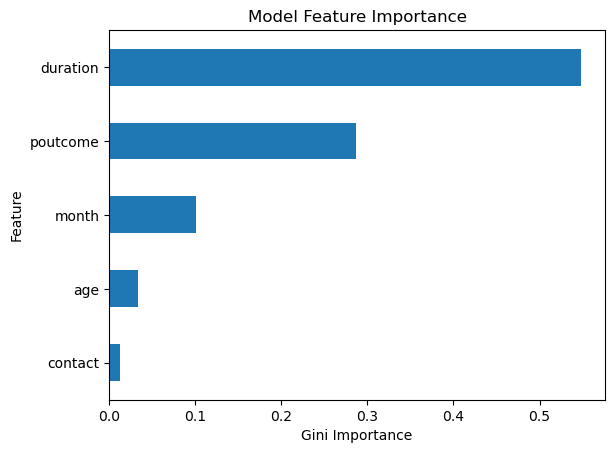

In [21]:
# Get importances
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index = X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(5).plot(kind= "barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Model Feature Importance");

It is observed that  `duration` has the highest impact on the model, followed by `outcome of the previous marketing campaign`, `last contact month of year`, `age of the client` and lastly `communication type`

### Saving the model

In [22]:
import pickle

# Save your model as `"model-2.pkl"`
with open("model-1.pkl", "wb") as f: 
        pickle.dump(model, f) 

<center>
<table>
  <tr>
    <th>Date (YYYY-MM-DD)</th>
    <th>Author</th>
  </tr>
  <tr>
    <td>2025-02-20</td>
    <td>Andrew Kalumba Harris</td>
    <td>andrewkalumbaharris@gmail.com</td>
  </tr>
</table>
</center>
